<h1 align="center">PDF Parsing Playbook</h1>

### Developed by: Adam Eckert
### Last Updated: 13 July 2021

# Goal: To extract text and metadata from PDF documents and output to CSV

## Here we will import the packages we need (You may have to pip install packages)

In [1]:
import tika
import re
import pandas as pd
from datetime import datetime
from pprint import pprint
import json
import os
from IPython.display import Image
from IPython.display import display
tika.initVM()
from tika import parser, detector

## Now we will create two functions. The first called "get_text" will use Apache Tika to parse the PDF and collect the text as content. The second called "get_metadata" returns the metadata associated with the document. 

In [2]:
headers = {
    'X-Tika-PDFextractInlineImages': 'true',
    #"X-Tika-OCRLanguage": "eng",
    #'X-Tika-PDFocrStrategy': 'ocr_only'
}



def get_text(file):
    type = detector.from_file(file)
    if type == 'application/pdf':
        parsed = parser.from_file(file, headers=headers)
        content = parsed['content']
        print('HERE IS THE CONTENT:')
        print(parsed['content'])
        return content
    else:
        print("not pdf!")
        return "invalid file type"

    
    
def get_metadata(file):
    type = detector.from_file(file)
    if type == 'application/pdf':
        parsed = parser.from_file(file, headers=headers)
        metadata = parsed['metadata']
        print('HERE IS THE METADATA:')
        pprint(parsed['metadata']) #Make this line pprint to see JSON-like breakdown of metadata
        return metadata
    else:
        print("not pdf!")
        return "invalid file type"    


## Identifying the filepath

This cell will ask you for a PDF filepath. Do not include quotes. The example here will be /home/1368387696/examplenotebooks/PDF_Parsing_Playbook/pdf_parser_holder/test2.pdf

In [3]:
file_path = input("Enter a pdf file path: ")

Enter a pdf file path: /home/1368387696/examplenotebooks/PDF_Parsing_Playbook/pdf_parser_holder/test2.pdf


# Lets take a look at our test PDF to compare what we can extract from it
## Here are the three pages

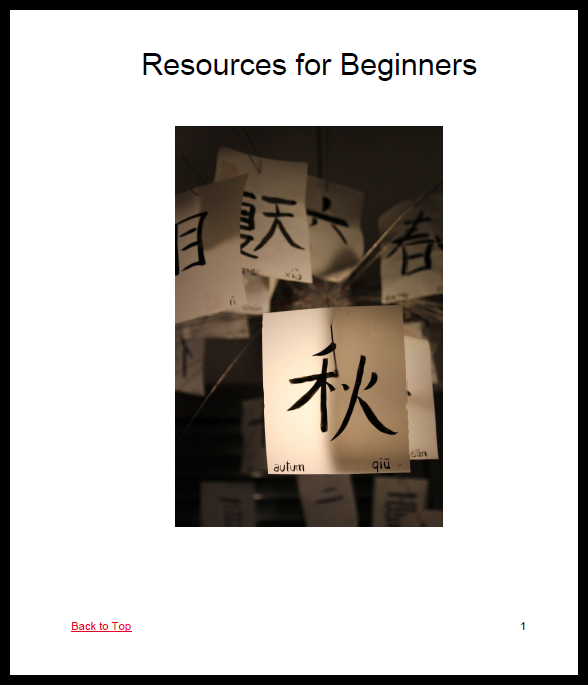

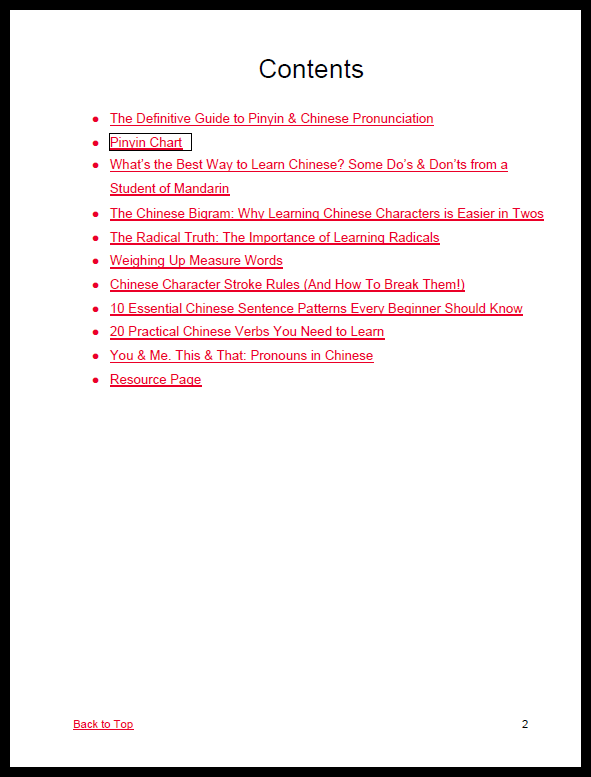

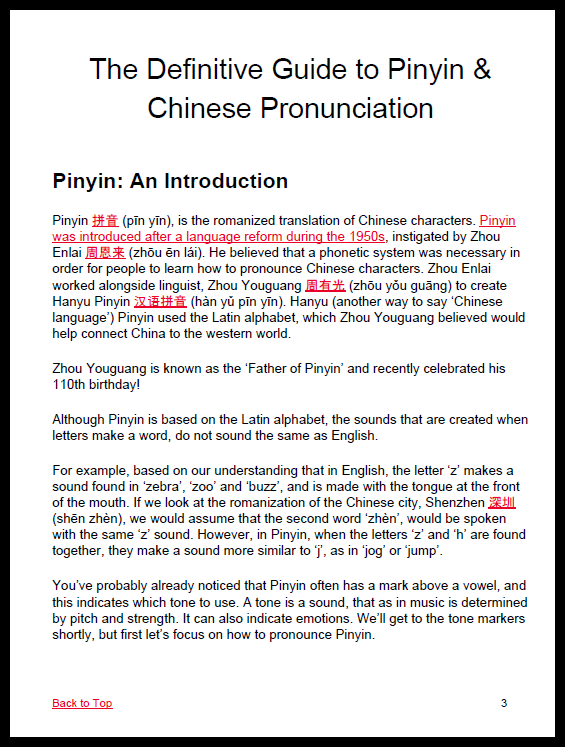

In [4]:
x = Image(filename='/home/1368387696/examplenotebooks/PDF_Parsing_Playbook/pdf_pictures/page1_test.PNG')
y = Image(filename='/home/1368387696/examplenotebooks/PDF_Parsing_Playbook/pdf_pictures/page2_test.PNG') 
z = Image(filename='/home/1368387696/examplenotebooks/PDF_Parsing_Playbook/pdf_pictures/page3_test.PNG')
display(x, y, z)

## Now we will call on get_text to extract the content as a string

In [5]:
pdf_text = get_text(file_path)

HERE IS THE CONTENT:











































Resources for Beginners 

Back to Top​  1 



Contents 

● The Definitive Guide to Pinyin & Chinese Pronunciation

● Pinyin Chart
● What’s the Best Way to Learn Chinese? Some Do’s & Don’ts from a 

Student of Mandarin

● The Chinese Bigram: Why Learning Chinese Characters is Easier in Twos

● The Radical Truth: The Importance of Learning Radicals

● Weighing Up Measure Words

● Chinese Character Stroke Rules (And How To Break Them!)

● 10 Essential Chinese Sentence Patterns Every Beginner Should Know

● 20 Practical Chinese Verbs You Need to Learn

● You & Me. This & That: Pronouns in Chinese

● Resource Page 

Back to Top​  2 



The Definitive Guide to Pinyin & 
Chinese Pronunciation 

 

Pinyin: An Introduction 
Pinyin ​拼音​ (pīn yīn), is the romanized translation of Chinese characters. ​Pinyin 
was introduced after a language reform during the 1950s​, instigated by Zhou 
Enlai ​周恩来​ (zhōu ēn lái). He believed that a pho

## Now we will call on get_metadata to extract the metadata as a python dictionary

In [6]:
pdf_metadata = get_metadata(file_path)

HERE IS THE METADATA:
{'Chroma BlackIsZero': 'true',
 'Chroma ColorSpaceType': 'RGB',
 'Chroma NumChannels': '4',
 'Component 1': 'Y component: Quantization table 0, Sampling factors 2 horiz/2 '
                'vert',
 'Component 2': 'Cb component: Quantization table 1, Sampling factors 1 '
                'horiz/1 vert',
 'Component 3': 'Cr component: Quantization table 1, Sampling factors 1 '
                'horiz/1 vert',
 'Compression CompressionTypeName': 'deflate',
 'Compression Lossless': 'true',
 'Compression NumProgressiveScans': '1',
 'Compression Type': 'Baseline',
 'Content-Type': ['application/pdf', 'image/png', 'image/jpeg'],
 'Creation-Date': '2017-05-15T09:42:32Z',
 'Data BitsPerSample': '8 8 8 8',
 'Data PlanarConfiguration': 'PixelInterleaved',
 'Data Precision': '8 bits',
 'Data SampleFormat': 'UnsignedIntegral',
 'Dimension HorizontalPixelSize': '0.35273367',
 'Dimension ImageOrientation': 'Normal',
 'Dimension PixelAspectRatio': '1.0',
 'Dimension VerticalPixelSi

# Use this block if you need to call the functions on a folder full of PDFs (Remove the "#" before each line and fill in your filepath)

In [7]:
#pdf_dir = '/home/1368387696/pdf_parser/pdf_holder/'

#text_dict = {}
#meta_dict = {}
#for path in os.listdir(pdf_dir):
    #if '.pdf' in path:
        #text_dict[path] = get_text(pdf_dir+path)
        #meta_dict[path] = get_metadata(pdf_dir+path)

# In order to create a dataframe and build a CSV, we first need to determine what from the parsed content and metadata we want as columns

## Let's say we want the table of contents to be a column in our CSV. Here's how identify that table of ocntents from the large string we parsed. 

In [8]:
table_of_contents = pdf_text.split('Contents')[1].split('Back to Top​  2')[0].strip()
print(table_of_contents)

● The Definitive Guide to Pinyin & Chinese Pronunciation

● Pinyin Chart
● What’s the Best Way to Learn Chinese? Some Do’s & Don’ts from a 

Student of Mandarin

● The Chinese Bigram: Why Learning Chinese Characters is Easier in Twos

● The Radical Truth: The Importance of Learning Radicals

● Weighing Up Measure Words

● Chinese Character Stroke Rules (And How To Break Them!)

● 10 Essential Chinese Sentence Patterns Every Beginner Should Know

● 20 Practical Chinese Verbs You Need to Learn

● You & Me. This & That: Pronouns in Chinese

● Resource Page


## Let's say we are also interested in "An Introduction" from "Pinyin: An Introduction" on page 3.
## Another example of this use case is grabbing the abstract TEXT from a journal article:
<h1 align="center">"Abstract: TEXT"</h1> 

In [9]:
pinyin_content = pdf_text.split('Pinyin:')[1].split('\n')[0].strip()
print(pinyin_content)

An Introduction


## Finally, lets identify relevant columns from our metadata dictionary such as document title, creation date, and the tool used to create the PDF

In [10]:
if pdf_metadata['dc:title'] == '':
    pdf_metadata['dc:title'] = 'Unknown'

creation_date = pdf_metadata['Creation-Date']      
doc_title = pdf_metadata['dc:title']
creator_tool = pdf_metadata['pdf:docinfo:creator_tool'] 
    
print('Document Title: ', doc_title)    
print('Creation Date: ', creation_date)
print('Creation Tool: ', creator_tool)

Document Title:  Unknown
Creation Date:  2017-05-15T09:42:32Z
Creation Tool:  Adobe Acrobat Pro DC 17.9.20044


## Now we will build our dataframe using Pandas

In [11]:
pd.set_option('max_colwidth', None)
pd.set_option('max_seq_item', None)
dict = {'Document Title': doc_title,'Creation Date': creation_date,'Creation Tool': creator_tool, 
        'Table of Contents': table_of_contents, 'Pinyin Contents': pinyin_content}
df = pd.DataFrame(dict, index=[0])

print('Here is our Pandas dataframe:')
display(df)

Here is our Pandas dataframe:


,Document Title,Creation Date,Creation Tool,Table of Contents,Pinyin Contents
0,Unknown,2017-05-15T09:42:32Z,Adobe Acrobat Pro DC 17.9.20044,● The Definitive Guide to Pinyin & Chinese Pronunciation\n\n● Pinyin Chart\n● What’s the Best Way to Learn Chinese? Some Do’s & Don’ts from a \n\nStudent of Mandarin\n\n● The Chinese Bigram: Why Learning Chinese Characters is Easier in Twos\n\n● The Radical Truth: The Importance of Learning Radicals\n\n● Weighing Up Measure Words\n\n● Chinese Character Stroke Rules (And How To Break Them!)\n\n● 10 Essential Chinese Sentence Patterns Every Beginner Should Know\n\n● 20 Practical Chinese Verbs You Need to Learn\n\n● You & Me. This & That: Pronouns in Chinese\n\n● Resource Page,An Introduction


## Creating the CSV: Send the dataframe to CSV based on a path you specify

In [12]:
output_path = '/home/1368387696/examplenotebooks/PDF_Parsing_Playbook/pdf_parser_csv_outputs/'

df.to_csv(output_path + doc_title + "_playbook_test.csv", header = True)

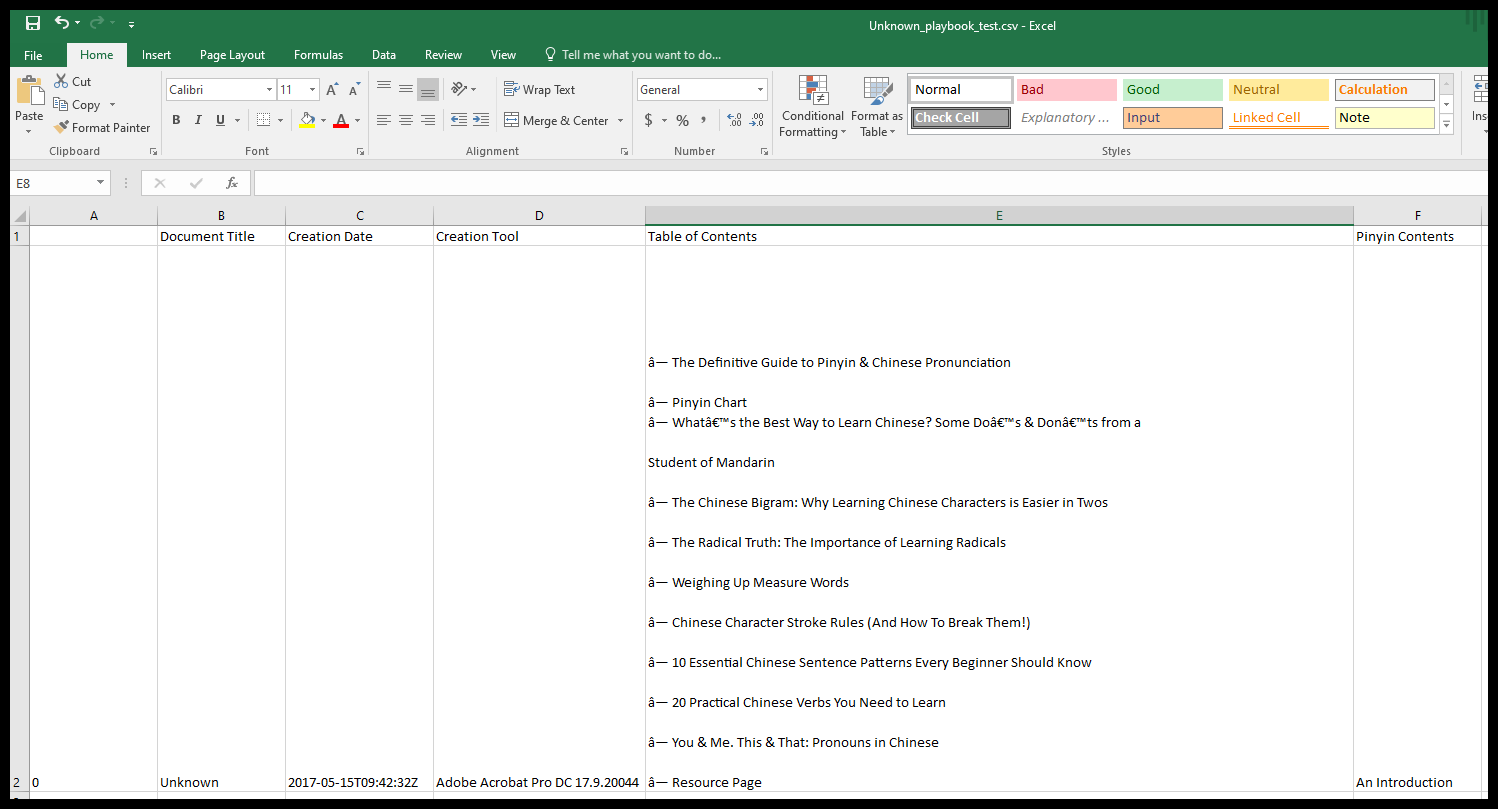

In [13]:
Image(filename='/home/1368387696/examplenotebooks/PDF_Parsing_Playbook/pdf_pictures/output_test.PNG')

&nbsp;
&nbsp;
&nbsp;